# EarlyStopping

In [1]:
import tensorflow as tf
from keras import datasets, layers, models, losses
import matplotlib.pyplot as plt

# Importamos para hacer un EarlyStopping
from keras.callbacks import EarlyStopping

In [2]:
# Cargar el conjunto de datos...
(train_img, train_lbl), (test_img, test_lbl) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
# Normalizar los valores de píxeles al rango [0, 1]
train_img, test_img = train_img / 255.0, test_img / 255.0

In [4]:
# Crear nuestra CNN (arquitectura)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

In [5]:
model.compile(
    optimizer='adam',
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [6]:
# Defino el EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

In [7]:
# history = model.fit(train_img, train_lbl, epochs=10, validation_data=(test_img, test_lbl))

history = model.fit(train_img, train_lbl, epochs=10, validation_data=(test_img, test_lbl),callbacks=[early_stopping]
)

Epoch 1/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.4926 - accuracy: 0.4582 - val_loss: 1.2361 - val_accuracy: 0.5565
Epoch 2/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.1472 - accuracy: 0.5930 - val_loss: 1.0523 - val_accuracy: 0.6303
Epoch 3/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.9839 - accuracy: 0.6548 - val_loss: 0.9964 - val_accuracy: 0.6526
Epoch 4/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.8865 - accuracy: 0.6893 - val_loss: 0.9394 - val_accuracy: 0.6706
Epoch 5/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8134 - accuracy: 0.7128 - val_loss: 0.9840 - val_accuracy: 0.6589
Epoch 6/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.7551 - accuracy: 0.7359 - val_loss: 0.8330 - val_accuracy: 0.7108
Epoch 7/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.7095 - accuracy: 0.7508 - val_loss: 0.8630 -

313/313 - 2s - loss: 0.8508 - accuracy: 0.7159 - 2s/epoch - 7ms/step

Accuracy del conjunto de prueba: 0.7159000039100647


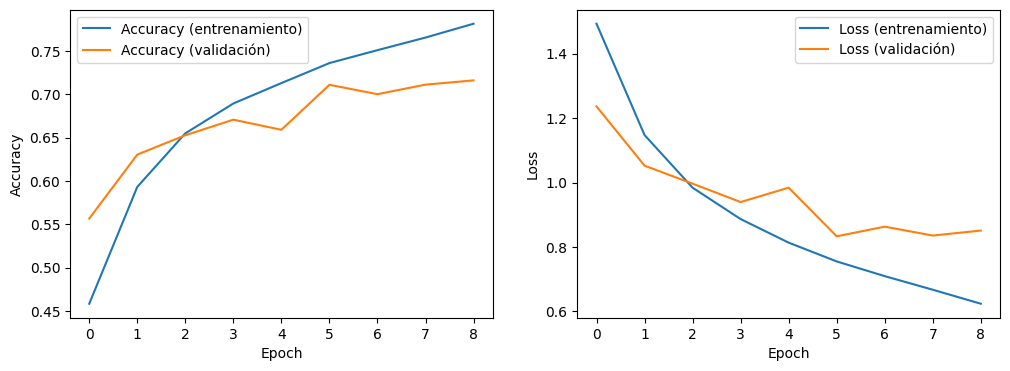

In [17]:
# Evaluar el modelo (en el cojunto de prueba)
test_loss, test_acc = model.evaluate(test_img, test_lbl, verbose=2)
print("\nAccuracy del conjunto de prueba:", test_acc)

# Gráficar el accuracy y el loss durante el entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy (entrenamiento)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validación)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss (entrenamiento)')
plt.plot(history.history['val_loss'], label='Loss (validación)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [9]:
import numpy as np

In [10]:
# Cargar el conjunto de datos...
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [11]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [12]:
# Crear nuestra CNN (arquitectura)
model2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPool2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [13]:
model2.compile(
    optimizer='adam',
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [14]:
history2 = model2.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2,callbacks=[early_stopping]
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


750/750 [==============================] - 16s 20ms/step - loss: 0.2004 - accuracy: 0.9413 - val_loss: 0.0790 - val_accuracy: 0.9778
Epoch 2/20
750/750 [==============================] - 15s 20ms/step - loss: 0.0650 - accuracy: 0.9810 - val_loss: 0.0605 - val_accuracy: 0.9827
Epoch 3/20
750/750 [==============================] - 16s 21ms/step - loss: 0.0435 - accuracy: 0.9867 - val_loss: 0.0568 - val_accuracy: 0.9841
Epoch 4/20
750/750 [==============================] - 15s 20ms/step - loss: 0.0285 - accuracy: 0.9914 - val_loss: 0.0536 - val_accuracy: 0.9846
Epoch 5/20
750/750 [==============================] - 15s 20ms/step - loss: 0.0210 - accuracy: 0.9935 - val_loss: 0.0503 - val_accuracy: 0.9863
Epoch 6/20
750/750 [==============================] - 16s 21ms/step - loss: 0.0140 - accuracy: 0.9960 - val_loss: 0.0653 - val_accuracy: 0.9838
Epoch 7/20
750/750 [==============================] - 15s 20ms/step - loss: 0.0113 - accuracy: 0.9966 - val_loss: 0.0646 - val_accuracy: 0.9812
Epo

In [15]:
# Evaluar el modelo (en el cojunto de prueba)
loss, acc = model2.evaluate(X_test, y_test, verbose=2)
print("\nAccuracy del conjunto de prueba:", acc)


313/313 - 1s - loss: 0.0555 - accuracy: 0.9838 - 1s/epoch - 4ms/step

Accuracy del conjunto de prueba: 0.9837999939918518


In [16]:
model2.save('ccn_early_stopping.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
